In [15]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import math
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

In [16]:
data = load_wine()
X = []
y = []

In [17]:
for i in range(130):
    X.append(data['data'][i])
    if data['target'][i] == 0:
        y.append(-1)
    if data['target'][i] == 1:
        y.append(1)

In [18]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [19]:
w_t = [0]*13
eta = 0.01
count = 0
x_axis = []
y_axis_sgd = []
while count < 5000:
    count += 1
    for i in range(130):
        c = (eta*y[i])/(1+math.exp(y[i]*np.dot(w_t, X[i])))
        v = [c*j for j in X[i]]
        w_t = np.add(w_t, v)
        
    loss = 0
    for i in range(130):
        loss += math.log(1+math.exp(-1*y[i]*np.dot(w_t, X[i])))
    y_axis_sgd.append(loss)
    x_axis.append(count)
    
print(count)
print(w_t)

5000
[-4.80156685 -1.71843865 -3.64010213  4.5613607  -0.67709047  0.19250325
 -1.16351531  0.60412466  0.57423706 -1.96776244  0.44040263 -2.11995367
 -6.20684003]


In [20]:
print(y_axis_sgd[len(y_axis_sgd)-1])

0.07695156503157798


In [21]:
y_pred = []
for i in range(130):
    v =np.dot(w_t, X[i])
    if v>0:
        y_pred.append(1)
    else:
        y_pred.append(-1)

In [22]:
accuracy_score(y, y_pred)

1.0

In [23]:
w_t = [0]*13
eta = 0.001
count = 0
x_axis = []
y_axis_cd = []
while count < 5000:
    count += 1
    for i in range(130):
        c = (y[i])/(1+math.exp(y[i]*np.dot(w_t, X[i])))
        v = [abs(c*j) for j in X[i]]
        v_new = [c*j for j in X[i]]
        max_index = np.argmax(v)
        w_t[max_index] += eta*v_new[max_index]

    loss = 0
    for i in range(130):
        loss += math.log(1+math.exp(-1*y[i]*np.dot(w_t, X[i])))
    y_axis_cd.append(loss)
    x_axis.append(count)
    
print(count)
print(w_t)

5000
[-3.196220639711379, -1.2013100217919972, -4.3538916274093475, 5.495416105889829, 0.12302392933730259, 0.036840355165491084, 0.4249055940107983, 1.2757959751613541, -0.6859161034696151, -0.8364580012065207, -0.9476322953708065, -2.3218979204350623, -2.3631148867993073]


In [24]:
print(y_axis_cd[len(y_axis_cd)-1])

1.7523728934657863


In [25]:
w_t = [0]*13
eta = 0.001
count = 0
x_axis = []
y_axis_rd = []
while count < 5000:
    count += 1
    for i in range(130):
        c = (y[i])/(1+math.exp(y[i]*np.dot(w_t, X[i])))
        v = [abs(c*j) for j in X[i]]
        v_new = [c*j for j in X[i]]
        max_index = random.randint(0, 12)
        w_t[max_index] += eta*v_new[max_index]

    loss = 0
    for i in range(130):
        loss += math.log(1+math.exp(-1*y[i]*np.dot(w_t, X[i])))
    y_axis_rd.append(loss)
    x_axis.append(count)
    
print(count)
print(w_t)

5000
[-1.6677695198116818, -0.5240027793219737, -0.9490688588454765, 1.29836004296092, -0.25812628112798014, -0.07686962553713074, -0.3543709300539891, 0.1458224980827075, 0.18644950787121145, -1.0139654098537167, 0.15149546331315983, -0.6214625781299163, -1.8744128930989876]


In [26]:
print(y_axis_rd[len(y_axis_rd)-1])

4.041159637588551


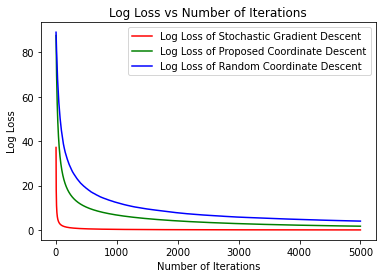

In [27]:
plt.plot(x_axis, y_axis_sgd, color='r', label='Log Loss of Stochastic Gradient Descent')
plt.plot(x_axis, y_axis_cd, color='g', label='Log Loss of Proposed Coordinate Descent')
plt.plot(x_axis, y_axis_rd, color='b', label='Log Loss of Random Coordinate Descent')
plt.xlabel('Number of Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Number of Iterations')
plt.legend()
plt.show()